In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
df = pd.read_csv("q2.csv")
df.columns = df.iloc[0]

In [324]:
df.drop([0], inplace=True) # First row is major categories and not needed
df.reset_index(inplace=True)
df.replace(np.nan, '', regex=True, inplace=True) # Make NaNs into empty strings
df.drop(df.index[[-1,-2]], inplace=True) # Last few rows are junk
df.head(10)

,index,ID,Q1 - Is there a specific problem Intercom can help you with?,Q2 - Why was ‘All of Intercom’ the right choice for you?,B2B,B2C,Other,Subscription,Company Name,Company Size,...,Automation,Price,Promo code/offer,Default selection,Intuitive / easy to use,Better than competitors,Support,Message my customers,Attract new customers,Need to understand customers
0,1,p6r3632c,Customers,It's easy,,B2C,,,Solv Technologies,1-4,...,,,,It's easy,,,,,,
1,2,vn91w40e,CHATBOT,F,,B2C,,,Novae,1-4,...,,,,,,,,,,
2,3,z38nwf9y,No,We'll find out,B2B,B2C,,,dc,1-4,...,,,,,,,,,,
3,4,z6jbsikj,Comms,Been here before,B2B,,,Subscription,Right in the Phills,1-4,...,,,,,,,,,,
4,5,ugb1o00r,TE$T APP,TE$TING,B2B,,,Subscription,iuasydfljadsf,1-4,...,,,,,,,,,,
5,6,zbq1po3z,Interact with customers,testing,B2B,,,,Khybr Digital,1-4,...,,,,,,,,,,
6,7,qlc2n72i,Customer Support primarily for now.,AI and superb customer support experience.,B2B,B2C,,Subscription,Social Media Entrepreneurs,1-4,...,,,,,,,,,,
7,8,cohj4lue,no,good,,,b,Subscription,myGov.,5-9,...,,,,,,,,,,
8,9,tw6v5abr,No,curious,B2B,,,Subscription,CEO Quest,5-9,...,,,,,,,,,,
9,10,ki3aoolx,test,test,B2B,,,Subscription,qa3,10-49,...,,,,,,,,,,


In [325]:
# Make type a categorical column rather than one hot
df['Type'] = df['B2B'] + df['B2C'] # Concatenate the data in the type column into a single combined string and use its length as an indicator of category
df['Type'] = df['Type'].apply(lambda x: 'Both' if len(x)>3 else x)
df['Type'] = df['Type'].apply(lambda x: 'None' if len(x)<3 else x)
df.drop(['B2B', 'B2C'], axis=1, inplace=True)
df = df[['ID','Q1 - Is there a specific problem Intercom can help you with?','Q2 - Why was ‘All of Intercom’ the right choice for you?','Type','Other','Subscription','Company Name','Company Size','name','email','What website or app do you plan to install Intercom on?','Exclude','ES or Non ES','Non-Blanks','Multiple needs','Experiment/exploring options','Not sure/confusion','Ignore answer','Reputation/Word of mouth/Recommendation','Want specific product','Scale or Grow','Integration','Streamline','Returning customers','Early Stage','Automation','Price','Promo code/offer','Default selection','Intuitive / easy to use','Better than competitors','Support','Message my customers','Attract new customers','Need to understand customers']]
df.head(8)

,ID,Q1 - Is there a specific problem Intercom can help you with?,Q2 - Why was ‘All of Intercom’ the right choice for you?,Type,Other,Subscription,Company Name,Company Size,name,email,...,Automation,Price,Promo code/offer,Default selection,Intuitive / easy to use,Better than competitors,Support,Message my customers,Attract new customers,Need to understand customers
0,p6r3632c,Customers,It's easy,B2C,,,Solv Technologies,1-4,Jillian Peirce,jillian@solv.co,...,,,,It's easy,,,,,,
1,vn91w40e,CHATBOT,F,B2C,,,Novae,1-4,Hugo,nova@yopmail.com,...,,,,,,,,,,
2,z38nwf9y,No,We'll find out,Both,,,dc,1-4,Dave,abc@dirtychook.com,...,,,,,,,,,,
3,z6jbsikj,Comms,Been here before,B2B,,Subscription,Right in the Phills,1-4,Phil Koziol,phil@koziol.io,...,,,,,,,,,,
4,ugb1o00r,TE$T APP,TE$TING,B2B,,Subscription,iuasydfljadsf,1-4,aoiudsyfaliusdhfaml aiusdyflkja sdnfk,asdiufyhalsjdbfalskdufh@intercom.io,...,,,,,,,,,,
5,zbq1po3z,Interact with customers,testing,B2B,,,Khybr Digital,1-4,Kyle Snodgrass,kyle@khybrdigital.com,...,,,,,,,,,,
6,qlc2n72i,Customer Support primarily for now.,AI and superb customer support experience.,Both,,Subscription,Social Media Entrepreneurs,1-4,Jaden Easton,accounts@youaresocialmedia.com,...,,,,,,,,,,
7,cohj4lue,no,good,None,b,Subscription,myGov.,5-9,mygov services,help@mygovsupportonlineservices.onmicrosoft.com,...,,,,,,,,,,


In [326]:
# Make a list the same length of the dataframe with a new combined value for category rather than the one hot encoding. It can be a list of lists if an item has multiple categories
cat = []
cat_cols = ['Multiple needs','Experiment/exploring options','Not sure/confusion','Ignore answer','Reputation/Word of mouth/Recommendation','Want specific product','Scale or Grow','Integration','Streamline','Returning customers','Early Stage','Automation','Price','Promo code/offer','Default selection','Intuitive / easy to use','Better than competitors','Support','Message my customers','Attract new customers','Need to understand customers']
sub_df = df[cat_cols]
for row in sub_df.itertuples():
    to_append = []
    for column in range(1,len(cat_cols)):
        if len(str(row[column]))>0: # Find the columns that have some text in them
            to_append.append(cat_cols[(column-1)]) # Make the column name of these non empty columns part of a list of categories to add for each row
    cat.append(to_append)
print(len(cat))

403


In [327]:
df.drop(cat_cols, axis=1, inplace=True)
column_values = pd.Series(cat)
df.head(6)
df.insert(loc=len(df.columns), column='Category', value=column_values)

In [328]:
df.head(6)

,ID,Q1 - Is there a specific problem Intercom can help you with?,Q2 - Why was ‘All of Intercom’ the right choice for you?,Type,Other,Subscription,Company Name,Company Size,name,email,What website or app do you plan to install Intercom on?,Exclude,ES or Non ES,Non-Blanks,Category
0,p6r3632c,Customers,It's easy,B2C,,,Solv Technologies,1-4,Jillian Peirce,jillian@solv.co,solv.co,,Non_ES,1,[Default selection]
1,vn91w40e,CHATBOT,F,B2C,,,Novae,1-4,Hugo,nova@yopmail.com,F,,Non_ES,1,[Ignore answer]
2,z38nwf9y,No,We'll find out,Both,,,dc,1-4,Dave,abc@dirtychook.com,A new client site,,Non_ES,1,[Experiment/exploring options]
3,z6jbsikj,Comms,Been here before,B2B,,Subscription,Right in the Phills,1-4,Phil Koziol,phil@koziol.io,www.checkamate.io,,Non_ES,1,[Ignore answer]
4,ugb1o00r,TE$T APP,TE$TING,B2B,,Subscription,iuasydfljadsf,1-4,aoiudsyfaliusdhfaml aiusdyflkja sdnfk,asdiufyhalsjdbfalskdufh@intercom.io,Intercom :),Yes,,,[]
5,zbq1po3z,Interact with customers,testing,B2B,,,Khybr Digital,1-4,Kyle Snodgrass,kyle@khybrdigital.com,khybrdigital.com,,Non_ES,1,[Experiment/exploring options]


In [329]:
df.replace(np.nan, '', regex=True, inplace=True)

# Convert the dataframe to a list of dictionary entries for easier looping
df_dictlist = df.to_dict(orient='records')
new_df_dictlist = []
for index, row in enumerate(df_dictlist):
    if len(row['Category']) == 1: # Items with a single category just have the row with the category added to the dataframe
        row['Category'] = row['Category'][0]
        if row['Category'] != 'Ignore answer':
            new_df_dictlist.append(row)
    elif len(row['Category']) == 0: # Items with no category have the row added and an empty string as the category value
        row['Category'] = ''
        #new_df_dictlist.append(row)
    else: # Items with mutiple categories need to be looped over and have a duplicate of the row added along with each category
        for item in row['Category']:
            row['Category'] = item
            if row['Category'] != 'Ignore answer':
                new_df_dictlist.append(row.copy())

# Convert the list of dictionary entries back to a dataframe
new_df = pd.DataFrame(data=new_df_dictlist)
df = new_df
df.head(-10)
df.to_csv('out.csv')

In [330]:
# fig, ax = plt.subplots(figsize=(20,7))
# df.groupby(by=['Category', 'Type'])['ID'].count().unstack().plot(kind='bar',ax=ax, stacked=True)
# plt.tight_layout
# plt.savefig('out.pdf', bbox_inches = "tight")
# plt.savefig('out.png', bbox_inches = "tight")

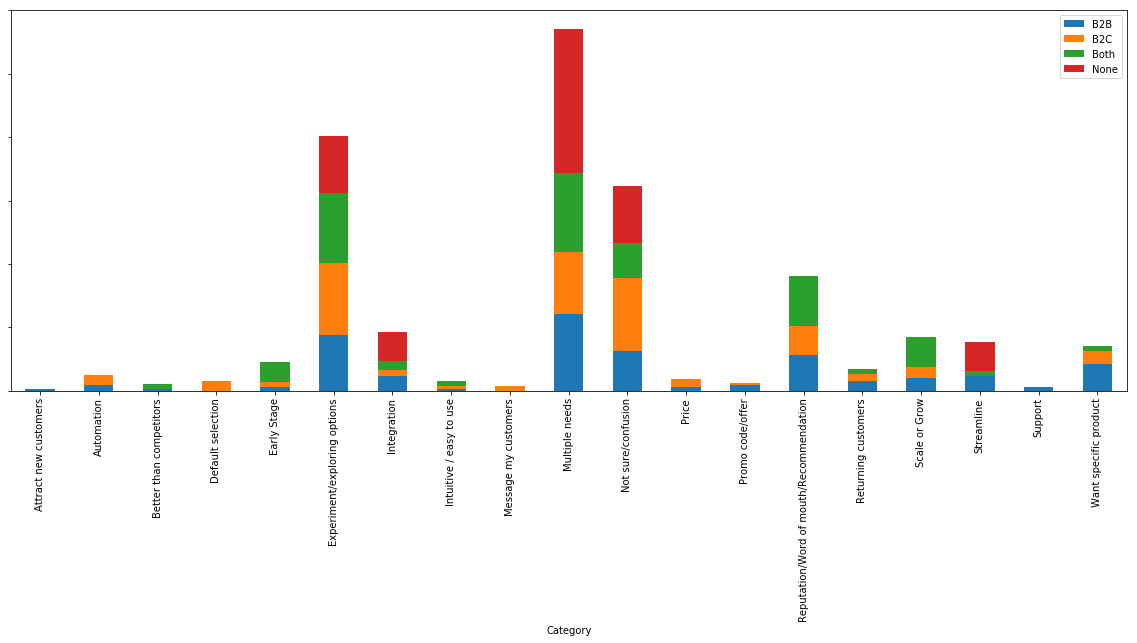

In [331]:
# Try grouping and plotting for each categorical column. Normalise the quantities based on assuming an equal number of results from each category such that each 'colour' should nominally be 1/4 of the bar
grouped_df = df.groupby(by=['Category', 'Type'])['ID'].count().unstack()
totals = grouped_df.sum()
B2B_prop = totals['B2B']/totals.sum()
B2C_prop = totals['B2C']/totals.sum()
Both_prop = totals['Both']/totals.sum()
None_prop = totals['None']/totals.sum()

new_B2B = (grouped_df['B2B']*B2B_prop)/(grouped_df['B2B']*B2B_prop).sum()
new_B2C = (grouped_df['B2C']*B2C_prop)/(grouped_df['B2C']*B2C_prop).sum()
new_Both = (grouped_df['Both']*Both_prop)/(grouped_df['Both']*Both_prop).sum()
new_None = (grouped_df['None']*None_prop)/(grouped_df['None']*None_prop).sum()

new_df = pd.DataFrame({'B2B': new_B2B,'B2C': new_B2C, 'Both': new_Both, 'None': new_None})

fig, ax = plt.subplots(figsize=(20,7))
ax.set_yticklabels([])
new_df.plot(kind='bar',ax=ax, stacked=True)

plt.tight_layout
plt.savefig('type.pdf', bbox_inches = "tight")
plt.savefig('type.png', bbox_inches = "tight")

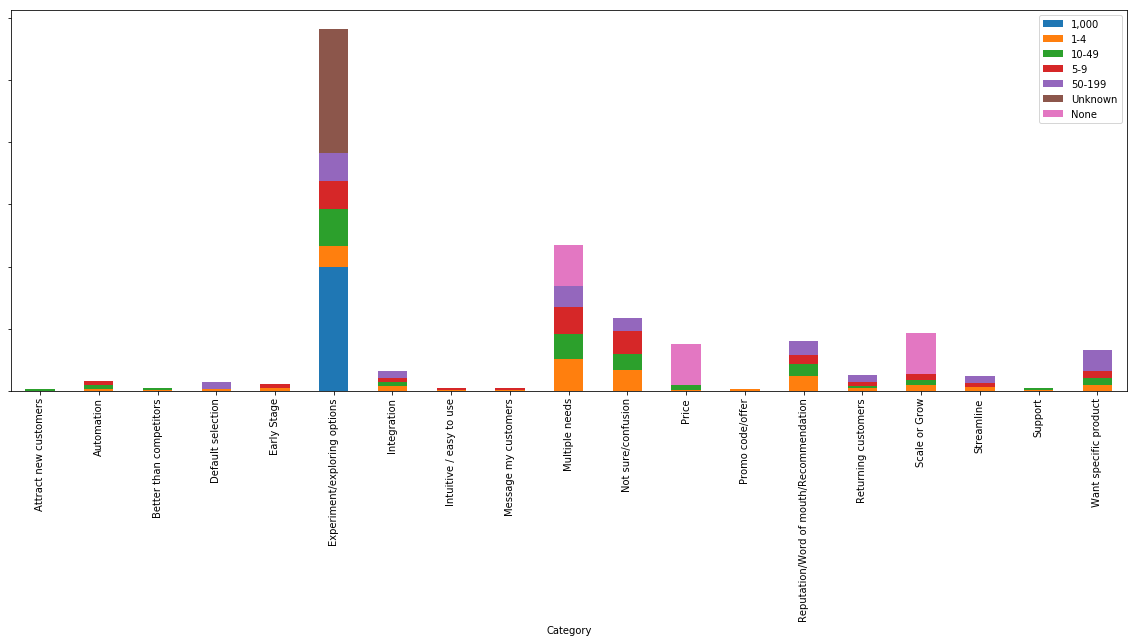

In [332]:
grouped_df = df.groupby(by=['Category', 'Company Size'])['ID'].count().unstack()
totals = grouped_df.sum()
f1000_prop = totals['1,000']/totals.sum()
f1to4_prop = totals['1-4']/totals.sum()
f10to49_prop = totals['10-49']/totals.sum()
f5to9_prop = totals['5-9']/totals.sum()
f50to199_prop = totals['50-199']/totals.sum()
#f500to999_prop = totals['500-999']/totals.sum()
Unknown_prop = totals['Unknown']/totals.sum()
None_prop = totals['']/totals.sum()

new_1000 = (grouped_df['1,000']*f1000_prop)/(grouped_df['1,000']*f1000_prop).sum()
new_1to4 = (grouped_df['1-4']*f1to4_prop)/(grouped_df['1-4']*f1to4_prop).sum()
new_10to49 = (grouped_df['10-49']*f10to49_prop)/(grouped_df['10-49']*f10to49_prop).sum()
new_5to9 = (grouped_df['5-9']*f5to9_prop)/(grouped_df['5-9']*f5to9_prop).sum()
new_50to199 = (grouped_df['50-199']*f50to199_prop)/(grouped_df['50-199']*f50to199_prop).sum()
#new_500to999 = (grouped_df['500-999']*f500to999_prop)/(grouped_df['500-999']*f500to999_prop).sum()
new_Unknown = (grouped_df['Unknown']*Unknown_prop)/(grouped_df['Unknown']*Unknown_prop).sum()
new_None = (grouped_df['']*None_prop)/(grouped_df['']*None_prop).sum()

new_df = pd.DataFrame({'1,000': new_1000, '1-4': new_1to4, '10-49': new_10to49, '5-9': new_5to9, '50-199': new_50to199, 'Unknown': new_Unknown, 'None': new_None}) # '500-999': new_500to999

fig, ax = plt.subplots(figsize=(20,7))
ax.set_yticklabels([])
new_df.plot(kind='bar',ax=ax, stacked=True)

plt.tight_layout
plt.savefig('size.pdf', bbox_inches = "tight")
plt.savefig('size.png', bbox_inches = "tight")

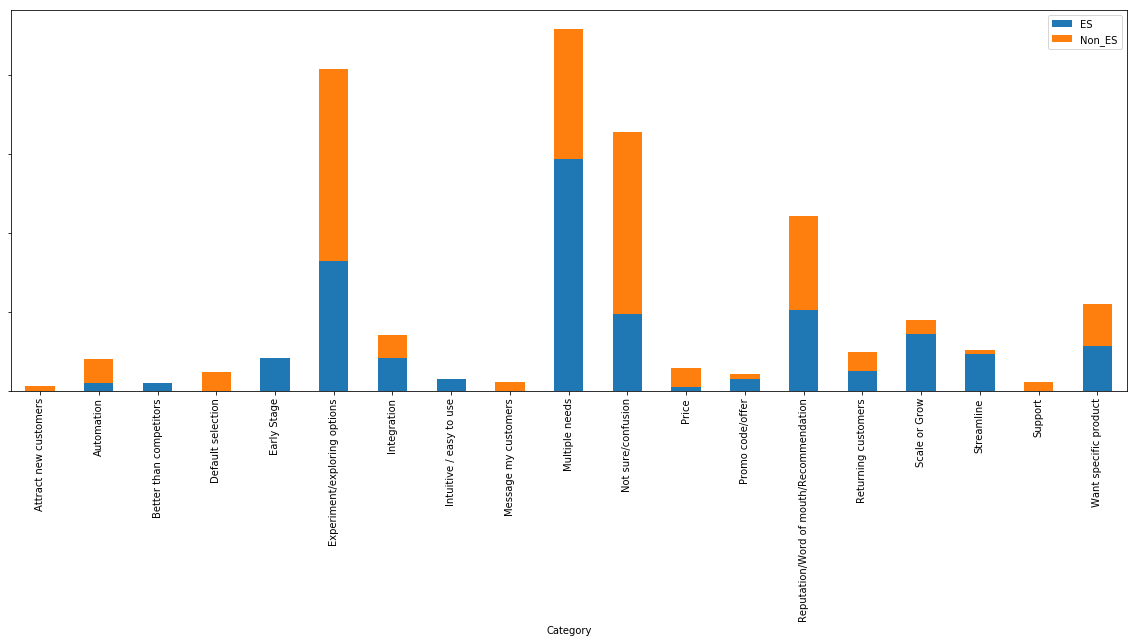

In [333]:
grouped_df = df.groupby(by=['Category', 'ES or Non ES'])['ID'].count().unstack()
totals = grouped_df.sum()
ES_prop = totals['ES']/totals.sum()
Non_ES_prop = totals['Non_ES']/totals.sum()
#None_prop = totals['']/totals.sum()

new_ES = (grouped_df['ES']*ES_prop)/(grouped_df['ES']*ES_prop).sum()
new_Non_ES = (grouped_df['Non_ES']*Non_ES_prop)/(grouped_df['Non_ES']*Non_ES_prop).sum()
#new_None = (grouped_df['']*None_prop)/(grouped_df['']*None_prop).sum()

new_df = pd.DataFrame({'ES': new_ES, 'Non_ES': new_Non_ES}) # 'None': new_None

fig, ax = plt.subplots(figsize=(20,7))
ax.set_yticklabels([])
new_df.plot(kind='bar',ax=ax, stacked=True)

plt.tight_layout
plt.savefig('es.pdf', bbox_inches = "tight")
plt.savefig('es.png', bbox_inches = "tight")